In [4]:
# Predicting Commuter Transportation Choices (Python)

# import packages into the workspace for this program
from __future__ import division, print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# read data from comma-delimited text file... create DataFrame object
path='C:\\Users\\HP\\Documents\\backup_20161214\\Documents\\teaching\\phd seminar 2017\\marketing data science\\MDS_Chapter_2\\'
sydney = pd.read_csv(path+"sydney.csv")

# check input DataFrame
print(sydney)

# dictionary object to convert string to binary integer 

response_to_binary = {'TRAIN':1, 'CAR':0}

y = sydney['choice'].map(response_to_binary)
cartime = sydney['cartime']
carcost = sydney['carcost']
traintime = sydney['traintime']
traincost = sydney['traincost']

# define design matrix for the linear predictor
Intercept = np.array([1] * len(y))
x = np.array([Intercept, cartime, carcost, traintime, traincost]).T
df=sydney
df['y']=y
formula = 'y ~ cartime+carcost+traintime+traincost'
# generalized linear model for logistic regression
logistic_regression = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
#logistic_regression = sm.GLM(y, x, family=sm.families.Binomial())
sydney_fit = logistic_regression.fit()
print(sydney_fit.summary())

sydney['train_prob'] = sydney_fit.predict(linear = False)

# function to convert probability to choice prediction
def prob_to_response(response_prob, cutoff):
    if(response_prob > cutoff):
        return('TRAIN')
    else:
        return('CAR')
            
# add binary predictions to DataFrame sydney using cutoff value for the case
sydney['choice_pred'] = \
    sydney['train_prob'].apply(lambda d: prob_to_response(d, cutoff = 0.50))
    
# evaluate performance of logistic regression model    
# obtain confusion matrix and proportion of observations correctly predicted    
cmat = pd.crosstab(sydney['choice_pred'], sydney['choice']) 
a = float(cmat.ix[0,0])
b = float(cmat.ix[0,1])
c = float(cmat.ix[1,0]) 
d = float(cmat.ix[1,1])
n = a + b + c + d
predictive_accuracy = (a + d)/n  

print(cmat)
print('\n Percentage Correctly Predicted',\
     round(predictive_accuracy, 3), "\n")

     cartime  carcost  traintime  traincost choice
0         70       50         64         39  TRAIN
1         50      230         60         32  TRAIN
2         50       70         58         40    CAR
3         60      108         93         62    CAR
4         70       60         68         26  TRAIN
5         20       32         72         65    CAR
6         40       30         60         37  TRAIN
7         15        8         22         20    CAR
8         60       60         83         31  TRAIN
9         29       20         40         17    CAR
10        36       30         65         70    CAR
11        50       30        125         60    CAR
12        63       35        145         60    CAR
13        20       30         48         25    CAR
14        60       40         85         45    CAR
15        30       20         60         35  TRAIN
16        47       60         79         26  TRAIN
17        60       72         50         26  TRAIN
18        55       40         4

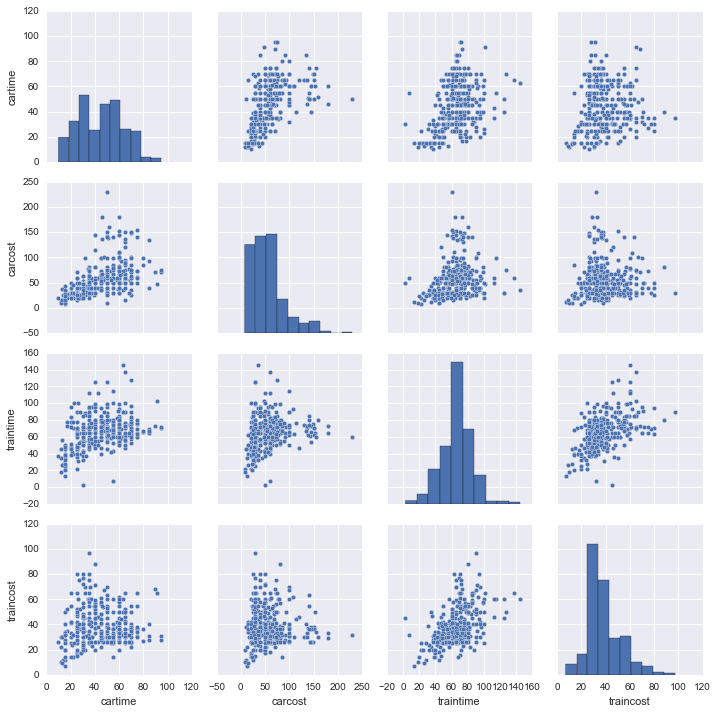

In [5]:
import seaborn as sns
import pandas as pd
sns.set()
%matplotlib inline
path='C:\\Users\\HP\\Documents\\backup_20161214\\Documents\\teaching\\phd seminar 2017\\marketing data science\\MDS_Chapter_2\\'
sydney = pd.read_csv(path+"sydney.csv")
#df = sns.load_dataset(sydney)
sns.pairplot(sydney)

C:\Users\HP\python-virtual-environments\env\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


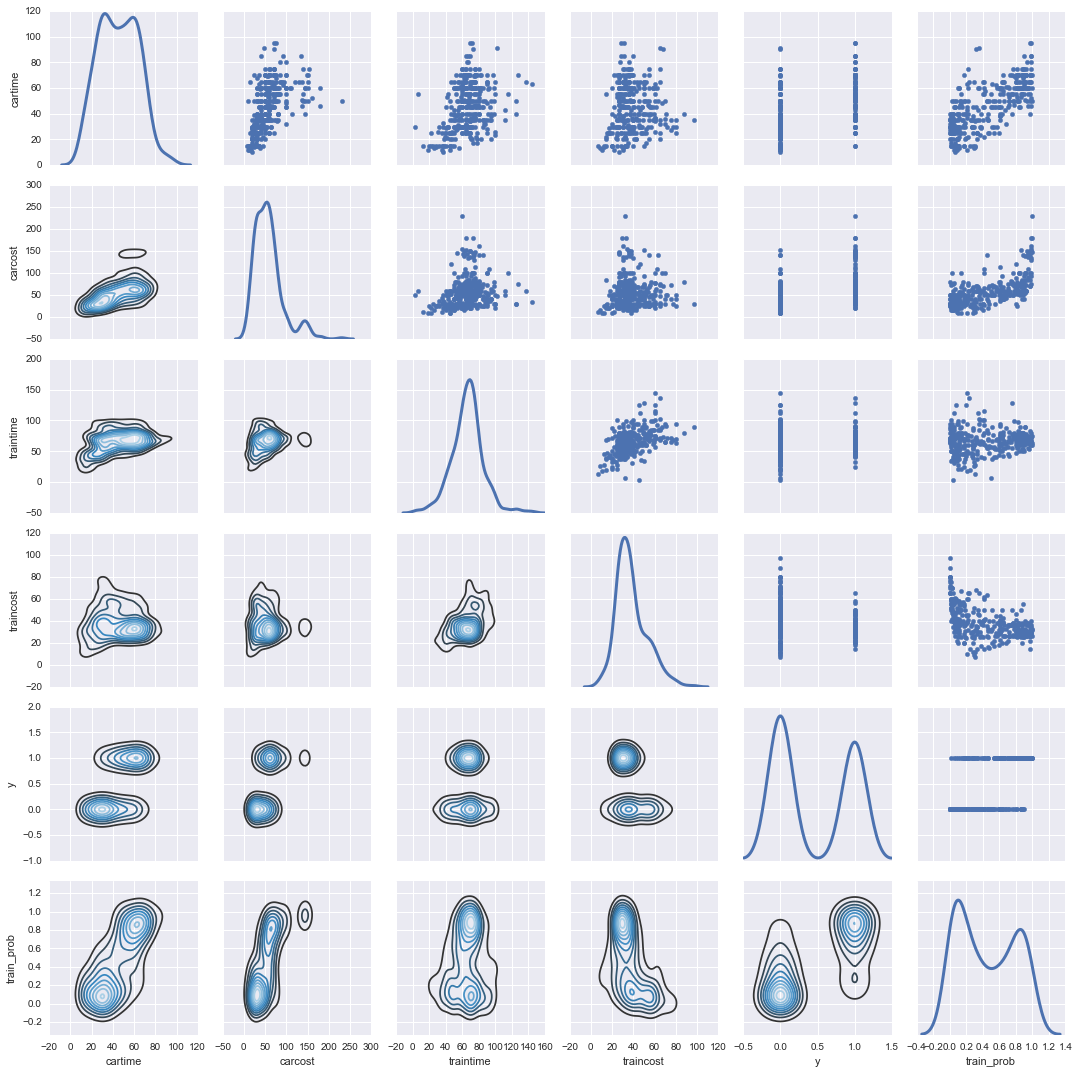

In [6]:
import matplotlib.pyplot as plt
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [1]:
2+2

4

In [20]:
pd.cros5stab(sydney['choice_pred'], sydney['choice'])

choice,CAR,TRAIN
choice_pred,,
CAR,155,30
TRAIN,28,120


In [29]:
sm.GLM(formula=formula, data=df, family=sm.families.Binomial())

TypeError: __init__() takes at least 3 arguments (2 given)

In [30]:
model = sm.glm(formula=formula, data=df, family=sm.families.Binomial())

AttributeError: 'module' object has no attribute 'glm'

In [34]:
import statsmodels.formula.api as smf

In [68]:
model = smf.glm(formula=formula, data=sydney, family=sm.families.Binomial())

In [69]:
print(model.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  333
Model:                            GLM   Df Residuals:                      330
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -192.09
Date:                Mon, 08 Aug 2016   Deviance:                       384.18
Time:                        10:07:22   Pearson chi2:                     325.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3345      0.233      1.433      0.152        -0.123     0.792
cartime    -6.751e-15   4.71e-15     -1.432      0.1

In [58]:
formula = 'y ~ cartime+carcost+traintime+traincost'